In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random

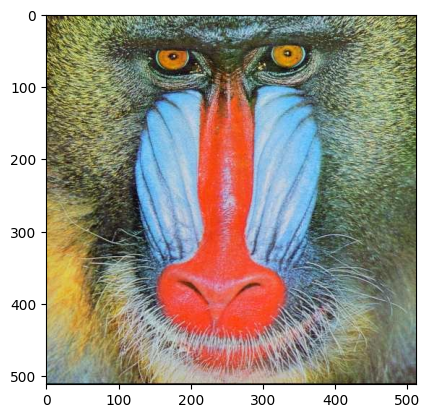

In [ ]:
image = cv2.imread('Baboon.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

##Adding Gaussain Noise

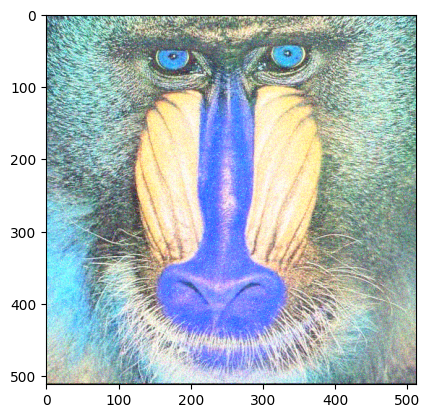

In [ ]:
noise = np.random.normal(50,20,image.shape).astype(np.uint8)
image_noise = cv2.add(image,noise)
plt.imshow(image_noise)
plt.show()

##Removing Gaussian Noise using Filter

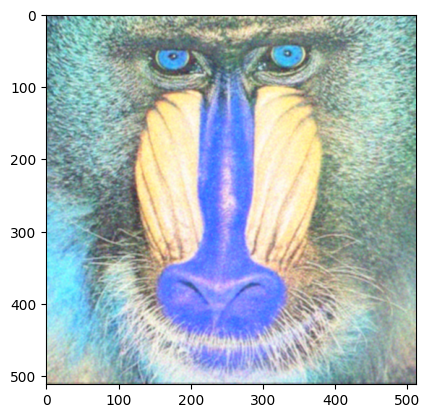

In [ ]:
filter = np.ones((3,3),np.float32)/9
newimg=cv2.filter2D(src=image_noise,ddepth=-1,kernel=filter)
plt.imshow(newimg)
plt.show()

##Adding salt and pepper noise

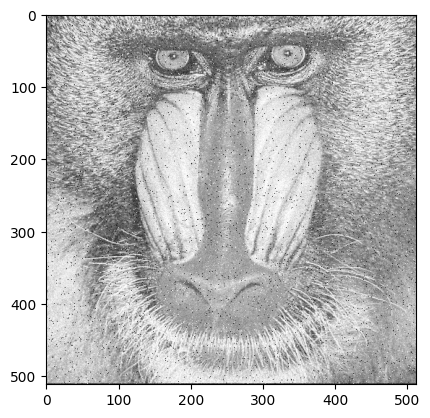

In [ ]:
greyimg = cv2.cvtColor(image_noise,cv2.COLOR_BGR2GRAY)
greynoiseimg = greyimg.copy()
for a in range(random.randint(3000,10000)):
  i = random.randint(0,len(image)-1)
  j = random.randint(0,len(image[0])-1)
  clr = random.choice([0,255])
  greynoiseimg[i,j] = clr
plt.imshow(greynoiseimg,cmap='gray')

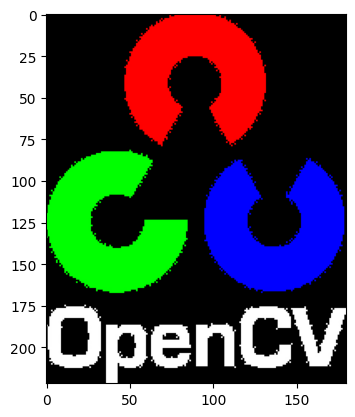

In [ ]:
image1 = cv2.imread('opencv-logo.png')
image_rgb1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb1)
plt.show()

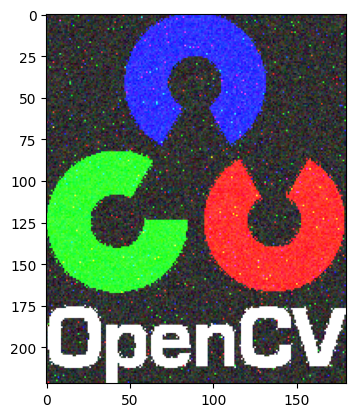

In [ ]:
noise1 = np.random.normal(50,20,image.shape).astype(np.uint8)
image_noise1 = cv2.add(image1,noise1)
plt.imshow(image_noise1)
plt.show()

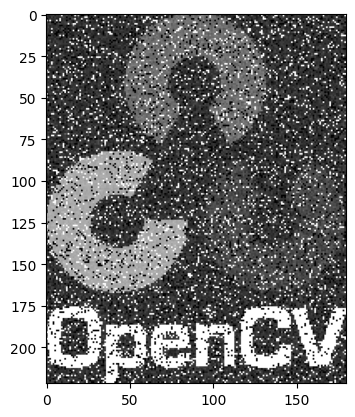

In [ ]:
greyimg1 = cv2.cvtColor(image_noise1,cv2.COLOR_BGR2GRAY)
greynoiseimg1 = greyimg1.copy()
for a in range(random.randint(3000,10000)):
  i = random.randint(0,len(image)-1)
  j = random.randint(0,len(image[0])-1)
  clr = random.choice([0,255])
  greynoiseimg1[i,j] = clr
plt.imshow(greynoiseimg1,cmap='gray')

##Removing Salt and Pepper Noise

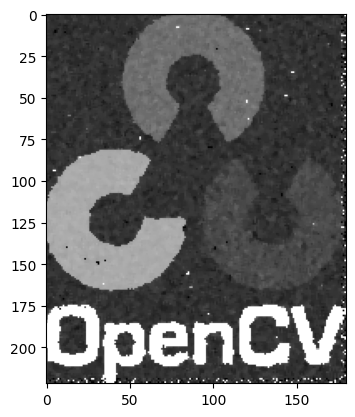

In [ ]:
denoised = greynoiseimg1.copy()
rows=greyimg1.shape[0]
cols=greyimg1.shape[1]
for i in range(rows-3):
  for j in range(cols-3):
    element = greynoiseimg1[i:i+3,j:j+3]
    element = element.reshape(-1)
    element.sort()
    denoised[i][j] = element[4]
plt.imshow(denoised,cmap='gray')

##Use fastNlMeansDenoisingColored

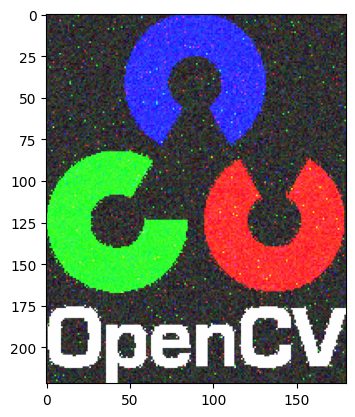

In [ ]:
denoisedclrimg = cv2.fastNlMeansDenoisingColored(src = image_noise1,h=5)
plt.imshow(denoisedclrimg)
plt.show()